# Chapter 7

## Section 7.2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_orders = pd.read_pickle('Chapter 5/orders.pickle')
df_items = pd.read_pickle('Chapter 5/items.pickle')
df_restaurants = ( 
    pd.read_pickle('Chapter 5/restaurants.pickle') ) 

## Section 7.4

In [3]:
df_full_time = pd.read_excel('raw data/university.xlsx',
                                 sheet_name='full_time')
df_part_time = pd.read_excel('raw data/university.xlsx',
                                 sheet_name='part_time')
df_grades = pd.read_excel('raw data/university.xlsx',
                                 sheet_name='grades')

In [4]:
df_full_time

,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan


In [5]:
df_part_time

,student_id,first_name,last_name,adviser
0,5,David,Freeman,Prof Duncan
1,6,Elizabeth,Brown,Prof Duncan
2,7,Amanda,Schultz,Prof Kennedy
3,8,Tanner,Perkins,Prof Alvarez
4,9,Ashley,Gonzales,Prof Kennedy
5,10,Latonya,Porter,Prof Alvarez
6,11,Jacinda,Peterson,Prof Alvarez


In [6]:
df_grades

,student_id,final_grade
0,1,95
1,3,71
2,6,76
3,7,91
4,8,75
5,11,59
6,15,86


## Section 7.5

### Section 7.5.1

In [7]:
df_students = pd.concat([df_full_time, df_part_time])
df_students

,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan
0,5,David,Freeman,Prof Duncan
1,6,Elizabeth,Brown,Prof Duncan
2,7,Amanda,Schultz,Prof Kennedy
3,8,Tanner,Perkins,Prof Alvarez
4,9,Ashley,Gonzales,Prof Kennedy
5,10,Latonya,Porter,Prof Alvarez


In [8]:
df_students = ( pd.concat([df_full_time, df_part_time])
                              .reset_index(drop=True) )
df_students

,student_id,first_name,last_name,adviser
0,1,Melvin,Ware,Prof Duncan
1,2,Thomas,Moore,Prof Brown
2,3,Joseph,Paul,Prof Alvarez
3,4,Sarah,Cruz,Prof Duncan
4,5,David,Freeman,Prof Duncan
5,6,Elizabeth,Brown,Prof Duncan
6,7,Amanda,Schultz,Prof Kennedy
7,8,Tanner,Perkins,Prof Alvarez
8,9,Ashley,Gonzales,Prof Kennedy
9,10,Latonya,Porter,Prof Alvarez


In [9]:
df_full_time['student_type'] = 'full_time'
df_part_time['student_type'] = 'part_time'
pd.concat([df_full_time, df_part_time]).reset_index(drop=True)

,student_id,first_name,last_name,adviser,student_type
0,1,Melvin,Ware,Prof Duncan,full_time
1,2,Thomas,Moore,Prof Brown,full_time
2,3,Joseph,Paul,Prof Alvarez,full_time
3,4,Sarah,Cruz,Prof Duncan,full_time
4,5,David,Freeman,Prof Duncan,part_time
5,6,Elizabeth,Brown,Prof Duncan,part_time
6,7,Amanda,Schultz,Prof Kennedy,part_time
7,8,Tanner,Perkins,Prof Alvarez,part_time
8,9,Ashley,Gonzales,Prof Kennedy,part_time
9,10,Latonya,Porter,Prof Alvarez,part_time


## Section 7.6

In [10]:
pd.merge(df_students,
         df_grades,
        left_on='student_id',
        right_on='student_id',
        how='inner')

,student_id,first_name,last_name,adviser,final_grade
0,1,Melvin,Ware,Prof Duncan,95
1,3,Joseph,Paul,Prof Alvarez,71
2,6,Elizabeth,Brown,Prof Duncan,76
3,7,Amanda,Schultz,Prof Kennedy,91
4,8,Tanner,Perkins,Prof Alvarez,75
5,11,Jacinda,Peterson,Prof Alvarez,59


In [11]:
pd.merge(df_grades,
         df_students[['student_id', 'first_name', 'last_name']],
        left_on='student_id',
        right_on='student_id',
        how='right')

,student_id,final_grade,first_name,last_name
0,1,95.0,Melvin,Ware
1,3,71.0,Joseph,Paul
2,6,76.0,Elizabeth,Brown
3,7,91.0,Amanda,Schultz
4,8,75.0,Tanner,Perkins
5,11,59.0,Jacinda,Peterson
6,2,NaN,Thomas,Moore
7,4,NaN,Sarah,Cruz
8,5,NaN,David,Freeman
9,9,NaN,Ashley,Gonzales


### Section 7.6.1

In [12]:
df_grades_2 = df_grades.copy().set_index('student_id')
df_grades_2.head()

,final_grade
student_id,
1,95
3,71
6,76
7,91
8,75


In [13]:
df_students_2 = df_students.copy().set_index('student_id')
df_students_2.head()

,first_name,last_name,adviser
student_id,,,
1,Melvin,Ware,Prof Duncan
2,Thomas,Moore,Prof Brown
3,Joseph,Paul,Prof Alvarez
4,Sarah,Cruz,Prof Duncan
5,David,Freeman,Prof Duncan


In [14]:
df_students_2['python_grade'] = df_grades_2.final_grade
df_students_2

,first_name,last_name,adviser,python_grade
student_id,,,,
1,Melvin,Ware,Prof Duncan,95.0
2,Thomas,Moore,Prof Brown,NaN
3,Joseph,Paul,Prof Alvarez,71.0
4,Sarah,Cruz,Prof Duncan,NaN
5,David,Freeman,Prof Duncan,NaN
6,Elizabeth,Brown,Prof Duncan,76.0
7,Amanda,Schultz,Prof Kennedy,91.0
8,Tanner,Perkins,Prof Alvarez,75.0
9,Ashley,Gonzales,Prof Kennedy,NaN


## Section 7.7

### Section 7.7.1

In [15]:
df_result = pd.merge(df_grades,
        df_students[['student_id', 'first_name', 'last_name']],
        left_on='student_id',
        right_on='student_id',
        how='left')

if df_result.first_name.isnull().sum() > 0:
    print('Warning! df_students is missing some students.')

df_result = df_result[df_result.first_name.notnull()]
df_result

Warning! df_students is missing some students.


,student_id,final_grade,first_name,last_name
0,1,95,Melvin,Ware
1,3,71,Joseph,Paul
2,6,76,Elizabeth,Brown
3,7,91,Amanda,Schultz
4,8,75,Tanner,Perkins
5,11,59,Jacinda,Peterson


## Section 7.8

In [16]:
pd.merge(df_grades,
        df_students,
        left_on='student_id',
        right_on='student_id',
        how='left',
        validate='one_to_one')

,student_id,final_grade,first_name,last_name,adviser
0,1,95,Melvin,Ware,Prof Duncan
1,3,71,Joseph,Paul,Prof Alvarez
2,6,76,Elizabeth,Brown,Prof Duncan
3,7,91,Amanda,Schultz,Prof Kennedy
4,8,75,Tanner,Perkins,Prof Alvarez
5,11,59,Jacinda,Peterson,Prof Alvarez
6,15,86,NaN,NaN,NaN


## Section 7.9

In [17]:
df_orders.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9


In [18]:
df_items.head()

,ITEM_ID,ITEM_NAME,ITEM_TYPE
0,I7,Farro with Summer Vegetables,Bases
1,I39,Spindrift Lemon,Drinks
2,I5,Classic Brown Rice,Bases
3,I36,Kombucha,Drinks
4,I8,Cauliflower with Garlic and Parmesan,Market Sides


In [19]:
df_restaurants.head()

,RESTAURANT_ID,NAME,ADDRESS,LAT,LONG,OPENING_DATE,DELIVERY_START
0,R10001,Columbia,"2884 Broadway, New York, NY 10025",40.811470,-73.961230,8/9/2014,2017-01-01
1,R10002,Midtown,"1379 6th Ave, New York, NY 10019",40.763640,-73.977960,3/19/2013,2018-05-01
2,R10005,Flatiron,"40 W 25th St, New York, NY 10010",40.743600,-73.991070,11/14/2013,2016-03-05
3,R10008,Williamsburg,"45 S 3rd St, Brooklyn, NY 11249",40.713749,-73.965782,10/12/2015,2017-01-01
4,R10004,NYU,"109 Macdougal St, New York, NY 10012",40.729930,-74.000820,1/10/2014,2017-01-01


In [20]:
df_res = pd.merge(df_orders,
                  df_restaurants[['RESTAURANT_ID','NAME']],
                  left_on='RESTAURANT_ID',
                  right_on='RESTAURANT_ID',
                  how='left').rename(columns={'NAME':'RESTAURANT_NAME'})

In [21]:
df_res.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg


In [22]:
( pd.merge(df_res,
            df_items[['ITEM_ID', 'ITEM_NAME']],
            left_on='MAIN',
            right_on='ITEM_ID',
            how='left')
    .rename(columns={'ITEM_NAME':'MAIN_NAME'}) ).head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,ITEM_ID,MAIN_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,I0,Charred Chicken Marketbowl
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,I0,Charred Chicken Marketbowl
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,I1,Spicy Meatballs Marketbowl


In [23]:
df_res = ( pd.merge(df_res,
                     df_items[['ITEM_ID', 'ITEM_NAME']],
                     left_on='MAIN',
                     right_on='ITEM_ID',
                     how='left')
             .rename(columns={'ITEM_NAME':'MAIN_NAME'})
             .drop(columns='ITEM_ID') )

In [24]:
df_res = ( pd.merge(df_res,
                     df_items[['ITEM_ID', 'ITEM_NAME']],
                     left_on='BASE',
                     right_on='ITEM_ID',
                     how='left')
             .rename(columns={'ITEM_NAME':'BASE_NAME'})
             .drop(columns='ITEM_ID') )

df_res = ( pd.merge(df_res,
                     df_items[['ITEM_ID', 'ITEM_NAME']],
                     left_on='SIDE_1',
                     right_on='ITEM_ID',
                     how='left')
             .rename(columns={'ITEM_NAME':'SIDE_1_NAME'})
             .drop(columns='ITEM_ID') )

df_res = ( pd.merge(df_res,
                     df_items[['ITEM_ID', 'ITEM_NAME']],
                     left_on='SIDE_2',
                     right_on='ITEM_ID',
                     how='left')
             .rename(columns={'ITEM_NAME':'SIDE_2_NAME'})
             .drop(columns='ITEM_ID') )

In [25]:
# Optional cell to bring in order details using a loop
# ====================================================

# We first bring in the restaurant name, as above
df_res = ( pd.merge(df_orders,
                     df_restaurants[['RESTAURANT_ID','NAME']],
                     left_on='RESTAURANT_ID',
                     right_on='RESTAURANT_ID',
                     how='left')
             .rename(columns={'NAME':'RESTAURANT_NAME'}) )

# We then loop through each "item" column we want to bring
# in. The variable c (which stands for "column") will contain
# the name of the column we are currently looping through. In
# each loop, we will simply apply the code we saw above, but
# in each loop, we
#   - Replace the left_on argument with c
#   - Put c into the name of the new column in the rename
#     statement, using an f-string
for c in ['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']:
    df_res = ( pd.merge(df_res,
                         df_items[['ITEM_ID', 'ITEM_NAME']],
                         left_on=c,
                         right_on='ITEM_ID',
                         how='left')
                 .rename(columns={'ITEM_NAME':f'{c}_NAME'})
                 .drop(columns='ITEM_ID') )

In [26]:
df_res.head()

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,RESTAURANT_NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese


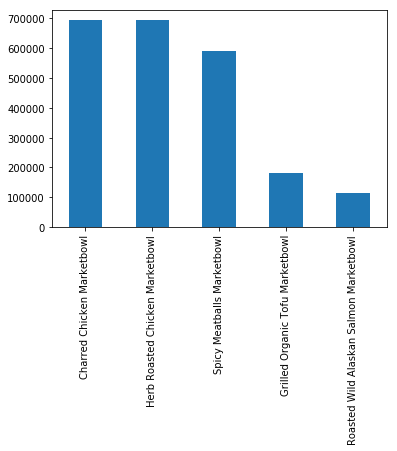

In [27]:
df_res.MAIN_NAME.value_counts().plot(kind='bar')

## Section 7.10

In [28]:
df_res.to_pickle('Chapter 7/orders.pickle')